In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

temperature = ctrl.Antecedent(np.arange(0, 40, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 100, 1), 'humidity')
weather = ctrl.Consequent(np.arange(0, 100, 1), 'weather')

# üyelik fonksiyonlarını oluşturuyoruz. triangular membership olarak.
temperature["low"] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature["med"] = fuzz.trimf(temperature.universe, [10, 25, 25])
temperature["high"] = fuzz.trimf(temperature.universe, [20, 35, 40])

humidity["low"] = fuzz.trimf(humidity.universe, [0, 35, 60])
humidity["high"] = fuzz.trimf(humidity.universe, [30, 70, 100])

weather['sunny'] = fuzz.trimf(weather.universe, [0, 0, 60])
weather['rainy'] = fuzz.trimf(weather.universe, [40, 100, 100])

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


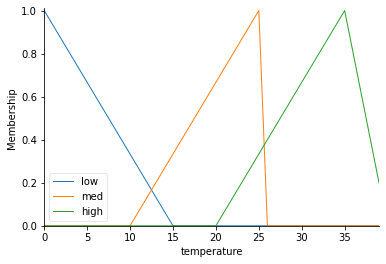

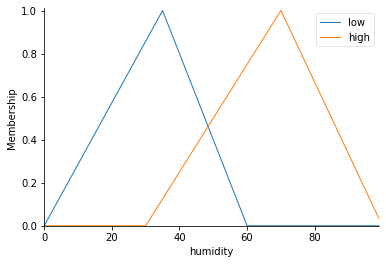

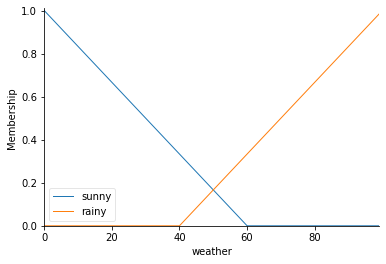

In [33]:
# üyelik fonksiyonlarının görselleştirilmesi
temperature.view()
humidity.view()
weather.view()

In [34]:
rule1 = ctrl.Rule(temperature['low'] | humidity['high'], weather['rainy'])
rule2 = ctrl.Rule(temperature['med'] & humidity['low'], weather['sunny'])
rule3 = ctrl.Rule(temperature['high'] & humidity['low'], weather['sunny'])
rule4 = ctrl.Rule(temperature['med'] | temperature['high'] & humidity['high'], weather['rainy'])

In [35]:
weather_ctrol = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
weather_sim = ctrl.ControlSystemSimulation(weather_ctrol)

In [36]:
# giriş değerlerimiz
weather_sim.input['temperature'] = 23
weather_sim.input['humidity'] = 55

weather_sim.compute()

65.49440518256776


c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


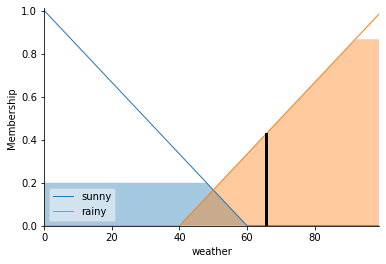

In [37]:
print(weather_sim.output['weather'])

# üyelik kfonksiyonunun grafiği
weather.view(sim=weather_sim)